#### About : The objective of this task is to predict key point position on Face Image. 
This can be used as a building block in several applications, such as:
* tracking faces in images and video
* analysing facial expressions
* detecting dysmorphic facial signs for medical diagnosis
* biometrics / face recognition 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

In [2]:
os.listdir('/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data')

['training.csv',
 'IdLookupTable.csv',
 '.DS_Store',
 'SampleSubmission.csv',
 'test.csv']

In [3]:
Train_Dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/training.csv'
Test_Dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/test.csv'
lookid_dir = '/Users/khadekirti/Desktop/Deep Learning/Facial Recognition/Data/IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)

Data Exploration 

In [4]:
train_data.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


Checking for missing value

In [5]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

So there are missing values in 28 columns. We can do two things here one remove the rows having missing values and another is the fill missing values with something. I used two option as removing rows will reduce our dataset. I filled the missing values with the previous values in that row.

In [6]:
train_data.fillna(method = 'ffill',inplace = True)

In [7]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

As there is no missing values we can now separate the labels and features. The image is our feature and other values are labes that we have to predict later. As image column values are in string format and there is also some missing values so we have to split the string by space and append it and also handling missing values

In [8]:
imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)

In [9]:
train_data['Image']

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
5       167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6       109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7       178 177 178 179 179 179 181 185 188 184 192 20...
8       164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9       226 227 225 224 221 220 215 210 210 208 206 18...
10      52 51 54 57 57 56 55 55 56 59 62 66 67 72 79 8...
11      142 124 123 133 140 147 151 147 137 136 125 12...
12      86 93 106 114 112 110 111 113 138 147 148 132 ...
13      75 65 63 75 70 78 84 97 106 71 39 25 23 21 18 ...
14      119 106 101 106 89 66 67 72 85 112 118 109 96 ...
15      52 54 74 76 55 48 47 41 38 37 34 33 33 31 30 3...
16      201 200 202 193 124 59 53 50 48 56 66 76 114 1...
17      202 20

 Lets reshape and convert it into float value.

In [42]:
image_list = np.array(imag,dtype = 'float')
X_train = image_list.reshape(-1,96,96)
X_train = X_train.reshape(7049,96,96,1)

Lets see what is the first image.

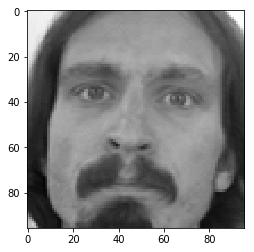

In [53]:
plt.imshow(X_train[0].reshape(96,96,),cmap='gray')
plt.show()

Now lets separate labels.

In [44]:
training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

As our data is ready for training , lets define our model. I am using keras and simple dense layers. For loss function I am using 'mse' ( mean squared error ) as we have to predict new values. Our result evaluted on the basics of 'mae' ( mean absolute error ) .

In [45]:
# Configure Model
from keras.models import Sequential
from keras.layers import Conv2D, Convolution2D,Activation, MaxPooling2D, Dropout, GlobalAveragePooling2D
from keras.layers import Flatten, Dense
from keras.layers.normalization import BatchNormalization


# Build a CNN architecture

model = Sequential()
model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Convolution2D(24, 5, 5, border_mode="same", init="he_normal", input_shape=(96, 96, 1), dim_ordering="tf"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))
model.add(Convolution2D(36, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))
model.add(Convolution2D(48, 5, 5))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode='valid'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D());
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(30))
# Summarize the model
model.summary()

/Users/khadekirti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(96, 96, 1..., padding="same", data_format="channels_last", kernel_initializer="he_normal")`
  if sys.path[0] == '':
/Users/khadekirti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  
/Users/khadekirti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5))`
  from ipykernel import kernelapp as app
/Users/khadekirti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
/Users/khadekirti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 96, 24)        624       
_________________________________________________________________
activation_6 (Activation)    (None, 96, 96, 24)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 36)        21636     
_________________________________________________________________
activation_7 (Activation)    (None, 44, 44, 36)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 36)        0         
__________

/Users/khadekirti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
/Users/khadekirti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`


Now our model is defined and we will train it by calling fit method. I ran it for 500 iteration keeping batch size and validtion set size as 20% ( 20% of the training data will be kept for validating the model 

In [46]:
from keras.callbacks import ModelCheckpoint, History
from keras.optimizers import Adam

hist = History()
epochs = 1100
batch_size = 64


## TODO: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist_final = model.fit(X_train, y_train, validation_split=0.2,epochs=epochs, batch_size=batch_size, callbacks=[hist], verbose=1)
 
    

Instructions for updating:
Use tf.cast instead.
Train on 5639 samples, validate on 1410 samples
Epoch 1/1100
5639/5639 [==============================] - 90s 16ms/step - loss: 381.5182 - acc: 0.4281 - val_loss: 172.0098 - val_acc: 0.6851
Epoch 2/1100
5639/5639 [==============================] - 96s 17ms/step - loss: 115.8878 - acc: 0.6045 - val_loss: 121.1070 - val_acc: 0.6759
Epoch 3/1100
5639/5639 [==============================] - 90s 16ms/step - loss: 81.6289 - acc: 0.6042 - val_loss: 65.3567 - val_acc: 0.6872
Epoch 4/1100
5639/5639 [==============================] - 78s 14ms/step - loss: 47.0883 - acc: 0.6052 - val_loss: 26.9380 - val_acc: 0.6872
Epoch 5/1100
5639/5639 [==============================] - 78s 14ms/step - loss: 21.2998 - acc: 0.6052 - val_loss: 28.1579 - val_acc: 0.6872
Epoch 6/1100
5639/5639 [==============================] - 77s 14ms/step - loss: 16.1750 - acc: 0.6052 - val_loss: 23.7364 - val_acc: 0.6872
Epoch 7/1100
5639/5639 [==============================] - 77

KeyboardInterrupt: 

Now lets prepare our testing data

In [54]:
#preparing test data
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

Reshaping and converting

In [55]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96)

Lets see first image in out test data

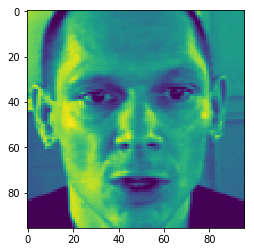

In [72]:
plt.imshow(X_test[2])
plt.show()

In [62]:
pred = model.predict(X_test.reshape(1783,96,96,1))

Now the last step is the create our submission file keeping in the mind required format. There should be two columns :- RowId and Location Location column values should be filled according the lookup table provided ( IdLookupTable.csv)

In [63]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [64]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [65]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [66]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [67]:
rowid = pd.Series(rowid,name = 'RowId')

In [68]:
loc = pd.Series(preded,name = 'Location')

In [69]:
submission = pd.concat([rowid,loc],axis = 1)
submission.head()

,RowId,Location
0,1,63.101902
1,2,36.372475
2,3,28.358076
3,4,33.355247
4,5,56.946941


In [70]:
submission.to_csv('face_key_detection_submission.csv',index = False)

Reference : https://www.kaggle.com/dimitrkovalsky/rnn-model